In [2]:
from Manifolds.GeneralizedEllipse import GeneralizedEllipse
import numpy as np
from numpy import zeros, eye
from numpy.linalg import solve, norm, det
from numpy.random import rand, randn
from tangential_hug_functions import Hug, HugTangential
from scipy.stats import multivariate_normal as MVN
from scipy.stats import wishart
from utils import MVN_scatters, quick_MVN_scatter, test_circle, ar_and_var_change_for_hug_thug
import matplotlib.pyplot as plt

# CIRCLE

The target density is $\pi = \mathcal{N}(0, I)$ and we consider the $z$-level set $\mathcal{C}_z = \{x\in\mathbb{R}^2\,:\, \log\pi(x) = z\}$. For this choice of target, $\mathcal{C}_z$ is a circle. Results

> **Increasing $\delta$, Dimension or $\alpha$** has no effect on the acceptance rate, which is always $1.0$ for both HUG and THUG. This is because, no matter which direction we move towards, the radial gradient and the symmetry of the circle will bring us back onto the circle (similar triangles). This can be checked by running `test_circle(x0, 100, q, δ, α, grad_logπ, logπ)` from `utils.py`.

In [2]:
# HUG/THUG parameters
T = 2.0
B = 5
δ = T / B
N = 1000
α = 0.99
# Contour parameters
d = 5
σ = 1.0
z = 0.01

In [3]:
# Ellipse
μ = zeros(d)
Σ = σ * eye(d)
ellipse = GeneralizedEllipse(μ, Σ, z)
x0 = ellipse.sample()
# Target (whose contour is ellipse)
π = MVN(μ, Σ)
logπ = π.logpdf
grad_logπ = lambda xy: - solve(Σ, xy)
# Proposal Density (for velocity)
q = MVN(mean=zeros(d), cov=eye(d))

In [4]:
test_circle(x0, 100, q, δ, α, grad_logπ, logπ)

(0.0, 0.0)

# ELLIPSOID

Target density $\pi = \mathcal{N}(0, \Sigma)$ where $\Sigma \sim\mathcal{W}(d, I_d)$ as per [here](https://math.stackexchange.com/questions/357980/how-to-generate-random-symmetric-positive-definite-matrices-using-matlab) and [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wishart.html). Good settings are $B=5$ and $T=\{2, 3, 5, 10\}$

> **Increasing dimension $d$ and increasing $\alpha$**: As we increase the dimension, for not-too-large values we still find a considerable improvement of Thug over Hug, for large $\alpha$s. As $d$ grows to even larger values, we still get some improvement in the variance for Thug, but at a much smaller scale. The cost of squeezing becomes larger because the squeezed MVN at the start has more "directions" where it could be disaligned from the squeezed MVN at the end.

> **Increasing $\delta$**: For each dimension, one can increase $\delta$ and we see that Thug is more robust to an increase in $\delta$ than Hug is. However, when $\delta$ is too large, then Thug starts rejecting a lot because the two squeezed MVNs become incompatible (due to the gradients being less compatible, as they are further away).

### Dimension $d=2$

In [66]:
# HUG/THUG parameters
T = 5.0                  ################### T = 2.0
B = 5
δ = T / B
N = 5000
# Contour parameters
d = 2
z = 0.01

# Manifold
μ = zeros(d)
Σ = wishart.rvs(df=d, scale=eye(d))
ellipse = GeneralizedEllipse(μ, Σ, z)
x0 = ellipse.sample()

# Target (whose contour is ellipse)
π = MVN(μ, Σ)
logπ = π.logpdf
grad_logπ = lambda xy: - solve(Σ, xy)

# Proposal Density for Velocity
q = MVN(mean=zeros(d), cov=eye(d))

αs = [0.1, 0.5, 0.9, 0.99]
ar_decreases, var_improv, s_hugs, s_thugs = ar_and_var_change_for_hug_thug(
    x0, T, B, N, αs, q, logπ, grad_logπ, Hug, HugTangential
)

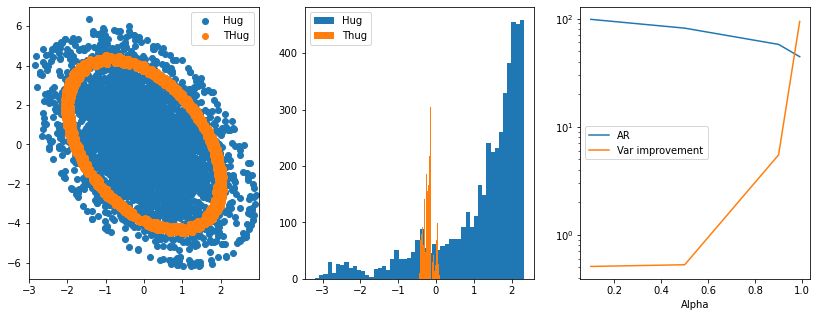

In [67]:
α_ix = 3

fig, ax = plt.subplots(ncols=3, figsize=(14, 5))
_ = ax[1].hist(logπ(s_hugs[α_ix]) - logπ(x0), bins=50, label="Hug")
_ = ax[1].hist(logπ(s_thugs[α_ix]) - logπ(x0), bins=50, label="Thug")
ax[1].legend()
ax0 = MVN_scatters([s_hugs[α_ix], s_thugs[α_ix]], π, 
             xlims=[-3,3], ylims=[-3, 3], figsize=(5,5), lw=0.5, levels=[z], labels=["Hug", "THug"], axis=ax[0],
            return_axes=True)
ax[2].plot(αs, 100 - np.array(ar_decreases), label="AR")
ax[2].plot(αs, var_improv, label="Var improvement")
ax[2].set_yscale("log")
ax[2].set_xlabel("Alpha")
plt.legend()
plt.show()

In [68]:
np.vstack((ar_decreases, var_improv))

array([[ 1.74728319, 18.53429911, 42.384664  , 55.67533291],
       [ 0.50764646,  0.52635629,  5.47117071, 94.06349595]])

### Dimension $d=5$

In [128]:
# HUG/THUG parameters
T = 5.0                    ############################################# T = 2.0
B = 5
δ = T / B
N = 5000
# Contour parameters
d = 5
z = 0.01

# Manifold
μ = zeros(d)
Σ = wishart.rvs(df=d, scale=eye(d))
ellipse = GeneralizedEllipse(μ, Σ, z)
x0 = ellipse.sample()

In [129]:
# Target (whose contour is ellipse)
π = MVN(μ, Σ)
logπ = π.logpdf
grad_logπ = lambda xy: - solve(Σ, xy)

# Proposal Density for Velocity
q = MVN(mean=zeros(d), cov=eye(d))

αs = [0.1, 0.5, 0.9, 0.99]
ar_decreases, var_improv, s_hugs, s_thugs = ar_and_var_change_for_hug_thug(
    x0, T, B, N, αs, q, logπ, grad_logπ, Hug, HugTangential
)

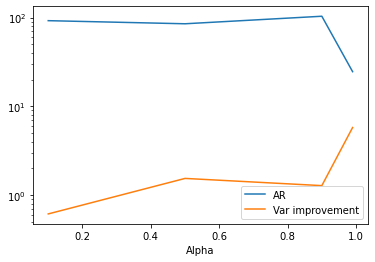

In [130]:
fig, ax = plt.subplots()
ax.plot(αs, 100 - np.array(ar_decreases), label="AR")
ax.plot(αs, var_improv, label="Var improvement")
ax.set_yscale("log")
ax.set_xlabel("Alpha")
plt.legend()
plt.show()

In [131]:
np.vstack((ar_decreases, var_improv))

array([[ 7.51445087, 14.67391304, -3.73134328, 75.37313433],
       [ 0.61532421,  1.54524555,  1.2817047 ,  5.78788955]])

### Dimension $d=10$

In [146]:
# HUG/THUG parameters
T = 3.0
B = 5
δ = T / B
N = 5000
# Contour parameters
d = 10
z = 0.01

# Manifold
μ = zeros(d)
Σ = wishart.rvs(df=d, scale=eye(d))
ellipse = GeneralizedEllipse(μ, Σ, z)
x0 = ellipse.sample()

In [147]:
# Target (whose contour is ellipse)
π = MVN(μ, Σ)
logπ = π.logpdf
grad_logπ = lambda xy: - solve(Σ, xy)

# Proposal Density for Velocity
q = MVN(mean=zeros(d), cov=eye(d))

αs = [0.1, 0.5, 0.9, 0.99]
ar_decreases, var_improv, s_hugs, s_thugs = ar_and_var_change_for_hug_thug(
    x0, T, B, N, αs, q, logπ, grad_logπ, Hug, HugTangential
)

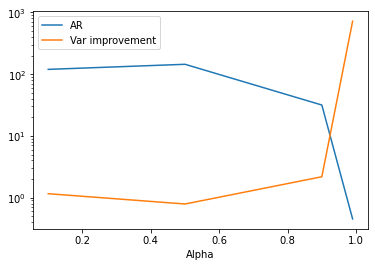

In [148]:
fig, ax = plt.subplots()
ax.plot(αs, 100 - np.array(ar_decreases), label="AR")
ax.plot(αs, var_improv, label="Var improvement")
ax.set_yscale("log")
ax.set_xlabel("Alpha")
plt.legend()
plt.show()

In [149]:
np.vstack((ar_decreases, var_improv))

array([[-19.67213115, -44.62365591,  68.34170854,  99.54751131],
       [  1.15900532,   0.78929265,   2.18030839, 720.57113262]])

In [287]:
from numpy.random import uniform

deterministic_simulator = lambda θ, z: θ + z
simulator = lambda θ: deterministic_simulator(θ, randn())

θmax = 5.0

# True value
θstar = uniform(low=0.0, high=θmax)
zstar = randn()
ystar = deterministic_simulator(θstar, zstar)

# Storage
θs = []
zs = []
ys = []

# Sample from prior many times
for i in range(3000):
    θ = uniform(low=0.0, high=θmax)
    z = randn()
    y = deterministic_simulator(θ, z)
    θs.append(θ)
    zs.append(z)
    ys.append(y)

θs, zs, ys = np.array(θs), np.array(zs), np.array(ys)
# Sort distances and grab only those close enough
distances = np.sqrt((ys - ystar)**2)
def apply_ϵ(ϵ):
    sort_ix = np.argsort(distances)[::-1]
    sorted_dist = distances[sort_ix]
    keep = sorted_dist <= ϵ
    keep_ix = sort_ix[keep]
    return θs[keep_ix], zs[keep_ix]
ϵ1 = 1.0
ϵ2 = 0.1
ϵ3 = 0.01
θs1, zs1 = apply_ϵ(ϵ1)
θs2, zs2 = apply_ϵ(ϵ2)
θs3, zs3 = apply_ϵ(ϵ3)

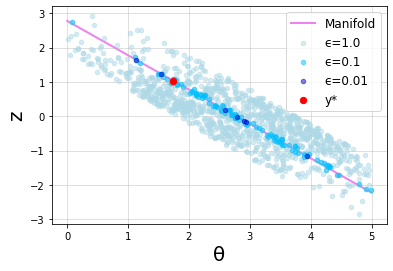

In [307]:
θ_manifold = np.linspace(0.0, θmax, 100)
z_manifold = ystar - θ_manifold
plt.plot(θ_manifold, z_manifold, label="Manifold", color="violet", zorder=1, linewidth=2)
plt.scatter(θs1, zs1, label="ϵ={}".format(ϵ1), color="lightblue", s=20, zorder=2, alpha=0.5)
plt.scatter(θs2, zs2, label="ϵ={}".format(ϵ2), color="deepskyblue", s=20, zorder=3, alpha=0.5)
plt.scatter(θs3, zs3, label="ϵ={}".format(ϵ3), color="mediumblue", s=20, zorder=4, alpha=0.5)
plt.scatter(θstar, zstar, label="y*", color="red", s=40, zorder=5)
plt.legend(fontsize=12)
plt.xlabel("θ", fontsize=20)
plt.ylabel("z", fontsize=20)
plt.grid(alpha=0.5)
plt.savefig("figures/straight_line.png")
plt.show()

3.9427467865305252

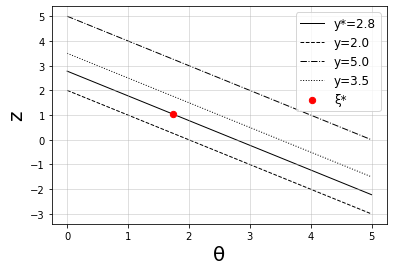

In [363]:
θ_manifold = np.linspace(0.0, θmax, 100)
plt.plot(θ_manifold, ystar - θ_manifold, color="black", zorder=1, linewidth=1, label="y*={:.1f}".format(ystar))
plt.plot(θ_manifold, 2.0 - θ_manifold, linestyle='--', color="black", zorder=1, linewidth=1, label="y=2.0")
plt.plot(θ_manifold, 5 - θ_manifold, linestyle='-.', color="black", zorder=1, linewidth=1, label="y=5.0")
plt.plot(θ_manifold, 3.5 - θ_manifold, linestyle=':', color="black", zorder=1, linewidth=1, label="y=3.5")
plt.scatter(θstar, zstar, label="ξ*", color="red", s=40, zorder=5)
plt.legend(fontsize=12)
plt.xlabel("θ", fontsize=20)
plt.ylabel("z", fontsize=20)
plt.grid(alpha=0.5)
plt.savefig("figures/bundle_of_lines.png")
plt.show()

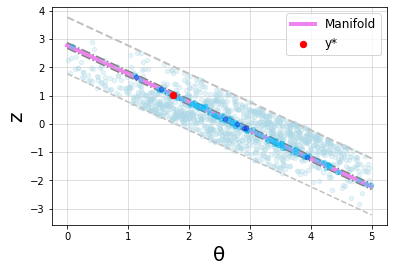

In [337]:
θ_manifold = np.linspace(0.0, θmax, 100)
z_manifold = ystar - θ_manifold
plt.plot(θ_manifold, z_manifold, label="Manifold", color="violet", zorder=1, linewidth=4)
plt.plot(θ_manifold, ystar - θ_manifold + ϵ1, color='silver', linestyle='--', linewidth=2)
plt.plot(θ_manifold, ystar - θ_manifold - ϵ1, color='silver', linestyle='--')
plt.plot(θ_manifold, ystar - θ_manifold + ϵ2, color='grey', linestyle='-.')
plt.plot(θ_manifold, ystar - θ_manifold - ϵ2, color='grey', linestyle='-.')
plt.scatter(θs1, zs1, color="lightblue", s=20, zorder=2, alpha=0.3)
plt.scatter(θs2, zs2, color="deepskyblue", s=20, zorder=3, alpha=0.3)
plt.scatter(θs3, zs3, color="mediumblue", s=20, zorder=4, alpha=0.3)
plt.scatter(θstar, zstar, label="y*", color="red", s=40, zorder=5)
plt.legend(fontsize=12)
plt.xlabel("θ", fontsize=20)
plt.ylabel("z", fontsize=20)
plt.grid(alpha=0.5)
plt.savefig("figures/straight_line.png")
plt.show()

In [8]:
from scipy.optimize import fsolve
from utils import prep_contour

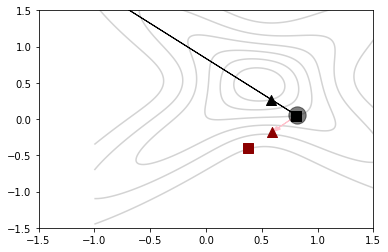

In [146]:
# First MVN
μ1 = zeros(2)
ρ1 = 0.9
σ11 = 1.0  # 0.5, 1.0
σ12 = 1.0
ρσσ1 = ρ1 * σ11 * σ12
Σ1 = np.array([[σ11**2, ρσσ1], [ρσσ1, σ12**2]])
c1 = det(2*np.pi*Σ1)**(-0.5)
# Second MVN
μ2 = np.array([0.5, 0.5])
ρ2 = -0.9
σ21 = 1.0
σ22 = 1.0
ρσσ2 = ρ2 * σ21 * σ22
Σ2 = np.array([[σ21**2, ρσσ2], [ρσσ2, σ22**2]])
c2 = det(2*np.pi*Σ2)**(-0.5)
α=0.5

def π(x):
    # Mixture
    return (1 - α) * MVN(μ1, Σ1).pdf(x) + α * MVN(μ2, Σ2).pdf(x)

def logπ(x):
    return np.log(π(x))

def grad_MVN(x, μ, Σ):
    return -solve(Σ, x - μ)

# def grad_π(x):
#     return (1 - α) * grad_MVN(x, μ1, Σ1) + α * grad_MVN(x, μ2, Σ2)
def grad_π(x):
    gMVN1 = -solve(Σ1, x - μ1)
    gMVN2 = -solve(Σ2, x - μ2)
    return (((1-α)/c1)*gMVN1*np.exp(-0.5*(x - μ1) @ gMVN1) + (α/c2)*gMVN2*np.exp(-0.5*(x-μ2) @ gMVN2)) / π(x)

def find_point_on_contour(start=zeros(2), z=0.22):
    return fsolve(lambda x: np.array([0, π(x) - z]), start)

def find_δ(start, v, z):
    return fsolve(lambda δ: π(start + (δ/2)*v) - z, 1.0)

def hug(start, v, δ):
    xmid = start + (δ/2)*v
    gmid = grad_π(start)
    gmid_hat = gmid / norm(gmid)
    vnew = v - 2*(v @ gmid_hat) * gmid_hat
    xend = xmid + (δ/2)*vnew
    return xmid, gmid_hat, vnew, xend
    
def grad_velocity(start, vnorm=np.sqrt(10), σ=0.2):
    # velocity almost parallel to the gradient
    velocity = grad_π(start) + σ * randn(2) 
    return (velocity / norm(velocity)) * vnorm

def tan_velocity(v):
    return np.array([-v[1], v[0]])
    


z = 0.2
start = find_point_on_contour([0.5, 0.05], z=z)
gstart_hat = grad_π(start) / norm(grad_π(start))
#v = np.array([-3.0, -1.0]) #np.array([-1.4844974, -1.06989352]) #MVN(zeros(2), eye(2)).rvs()
v = grad_velocity(start, σ=1.0)
#δ = find_δ(start, v, 0.16)
δ = 0.2

xmid, gmid_hat, vnew, xend = hug(start, v, δ)
# xmid = start + (δ/2)*v
# gmid = grad_π(xmid)
# gmid_hat = gmid / norm(gmid)
# vnew = v - 2*(v @ gmid_hat) * gmid_hat
# xend = xmid + (δ/2)*vnew

#v2 = np.array([-1.0, 3.0])
v2 = tan_velocity(v)
xmid2, gmid2_hat, vnew2, xend2 = hug(start, v2, δ)
# xmid2 = start + (δ/2)*v2
# gmid2 = grad_π(xmid2)
# gmid2_hat = gmid2 / norm(gmid2)
# vnew2 = v2 - 2*(v2 @ gmid2_hat) * gmid2_hat
# xend2 = xmid2 + (δ/2)*vnew2

# v3 = np.array([-0.2, 3.0])
# xmid3, gmid3_hat, vnew3, xend3 = hug(start, v3, δ)
# xmid3 = start + (δ/2)*v3
# gmid3 = grad_π(xmid3)
# gmid3_hat = gmid3 / norm(gmid3)
# vnew3 = v3 - 2*(v3 @ gmid3_hat) * gmid3_hat
# xend3 = xmid3 + (δ/2)*vnew3


fig, ax = plt.subplots()
#ax.contour(*prep_contour([-0.15, 0.55], [-0.15, 0.55], 0.001, π))
ax.contour(*prep_contour([-1, 2], [-2, 2.0], 0.01, π), colors='lightgray', zorder=1) #levels=[0.16, 0.185, 0.22], colors='lightgray', zorder=1) #levels=[0.1, 0.15, 0.185, 0.22])
ax.scatter(*start, zorder=2, s=300, color='black', alpha=0.5)   # Start
ax.scatter(*xmid, zorder=2, s=100, color='black', marker='^')    # Midpoint
ax.scatter(*xend, zorder=2, s=100, color='black', marker='s')    # Endpoint
# ax.arrow(*start, *(xmid-start), length_includes_head=True, head_width=0.05, head_length=0.08, color='darkgray')           ## Velocity
# ax.arrow(*xmid, *gmid_hat/2, length_includes_head=True, head_width=0.05, head_length=0.08, color='darkgray')
# ax.arrow(*xmid, *(xend-xmid), length_includes_head=True, head_width=0.05, head_length=0.08, color='darkgray')

ax.scatter(*xmid2, zorder=2, s=100, color='darkred', marker='^')
ax.scatter(*xend2, zorder=2, s=100, color='darkred', marker='s')
ax.arrow(*start, *(xmid2-start), length_includes_head=True, head_width=0.05, head_length=0.08, color='pink')
# ax.arrow(*xmid2, *gmid2_hat/2, length_includes_head=True, head_width=0.05, head_length=0.08, color='pink')
# ax.arrow(*xmid2, *(xend2-xmid2), length_includes_head=True, head_width=0.05, head_length=0.08, color='pink')

# ax.scatter(*xmid3, zorder=2, s=100, color='darkgreen', marker='^')
# ax.scatter(*xend3, zorder=2, s=100, color='darkgreen', marker='s')
# ax.arrow(*start, *(xmid2-start), length_includes_head=True, head_width=0.05, head_length=0.08, color='pink')
# ax.arrow(*xmid2, *gmid2_hat/2, length_includes_head=True, head_width=0.05, head_length=0.08, color='pink')
# ax.arrow(*xmid2, *(xend2-xmid2), length_includes_head=True, head_width=0.05, head_length=0.08, color='pink')


ax.arrow(*start, *grad_π(start))


ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.show()

In [114]:
(v / norm(v)) @ gstart_hat

0.9999240243861842

In [115]:
(v2 / norm(v2)) @ gstart_hat

-0.012326615729290327

In [143]:
from tangential_hug_functions import Hug, HugTangential

In [153]:
N = 100
T = 1.0
B = 5
x0 = find_point_on_contour([0.5, 0.0], z)
hsamples, haccept = Hug(x0, T, B, N, MVN(zeros(2), eye(2)), logπ, grad_π)
tsamples, taccept = HugTangential(x0, T, B, N, 0.9, MVN(zeros(2), eye(2)), logπ, grad_π)

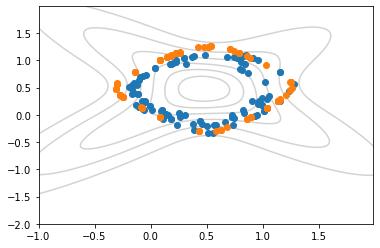

In [154]:
fig, ax = plt.subplots()
ax.contour(*prep_contour([-1, 2], [-2, 2.0], 0.01, π), colors='lightgray', zorder=1)
ax.scatter(*hsamples.T, label="Hug")
ax.scatter(*tsamples.T, label="Thug")

# New

In [1]:
import numpy as np
from scipy.stats import multivariate_normal as MVN
import matplotlib.pyplot as plt
from utils import logp as logp_scale
from Zappa.zappa import zappa_sampling_multivariate, zappa_sampling
from Zappa.ZappaStore import Zappa
from Manifolds.RotatedEllipse import RotatedEllipse
from utils import quick_MVN_scatter, MVN_scatters, prep_contour
from numpy.random import rand
from numpy.linalg import norm, solve, inv, det
from scipy.optimize import fsolve, root
from Manifolds.Manifold import Manifold
from tangential_hug_functions import Hug, HugTangential, NoAR
from utils import quick_3d_scatter, quick_3d_scatters
import plotly.graph_objects as go

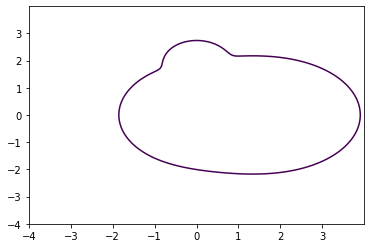

In [231]:
### Parameters of Mixture
# Means
mus = np.array([
    [0, 0],
    [2, 0],
    [0, 2]
])
# Covariances
Sigmas = np.stack([
    3.0 * np.eye(2),
    1.0 * np.eye(2),
    0.05 * np.eye(2)
])
# Mixture coefficients are all the same
d = mus.shape[0]
coefs = np.repeat(1/d, d)

# Gaussian Components
distributions = [MVN(mu, Sigma) for (mu, Sigma) in zip(mus, Sigmas)]

# Mixture, log mixture, grad of log mixture
MG = lambda xy: np.sum(np.vstack([c * MVN.pdf(xy)  for (c, MVN) in zip(coefs, distributions)]), axis=0)
logpi = lambda xy: np.log(MG(xy))
grad_log_pi = lambda xy: (1 / MG(xy)) * np.sum(np.vstack([- c * MVN(mu, Sigma).pdf(xy) * solve(Sigma, xy - mu) for (c, mu, Sigma) in zip(coefs, mus, Sigmas)]), axis=0)

# Find an odd contour
z = 0.010   # Sharp Turn: 0.016, Softer Turn: 0.004
plt.contour(*prep_contour([-4, 4], [-4, 4], 0.01, MG), levels=[z])
plt.show()

In [232]:
starting_guess = np.array([0.0, -2.5]) # Near Hook: np.array([-0.1, 2.5])
x0 = fsolve(lambda xy: np.append(MG(xy) - z, 0), starting_guess)

In [233]:
MGM = Manifold(m=1, d=1)
MGM.q = lambda xy: MG(xy) - z
MGM.Q = lambda xy: np.sum(np.vstack([- c * MVN(mu, Sigma).pdf(xy) * solve(Sigma, xy - mu) for (c, mu, Sigma) in zip(coefs, mus, Sigmas)]), axis=0).reshape(-1, 1)
logf = lambda xy: 0.0
logp = lambda xy: logp_scale(xy, sigma=1.0)
tol = 1.48e-08  
a_guess = np.array([0])
samples_zappa = zappa_sampling_multivariate(x0, MGM, logf, logp, 1000, 1.0, tol, a_guess)

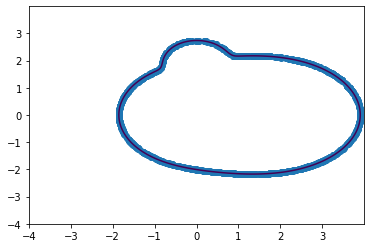

In [234]:
plt.scatter(*samples_zappa.T)
plt.contour(*prep_contour([-4, 4], [-4, 4], 0.01, MG), levels=[z])
plt.show()

In [255]:
seed = np.random.randint(0, 100000)    # 28242 (good for thug > hug)  # 69076 good to show Hug fails # 59828 pic
np.random.seed(seed)
print(seed)
N = 250
beta = 1.0
T = 1.0
B = 4
logπ = logpi
grad_π = grad_log_pi
q = MVN(np.zeros(2), beta * np.eye(2))
tsamples, tacc = HugTangential(x0, T, B, N, 0.9, q, logπ, grad_π)
hsamples, hacc = Hug(x0, T, B, N, q, logπ, grad_π)

52673


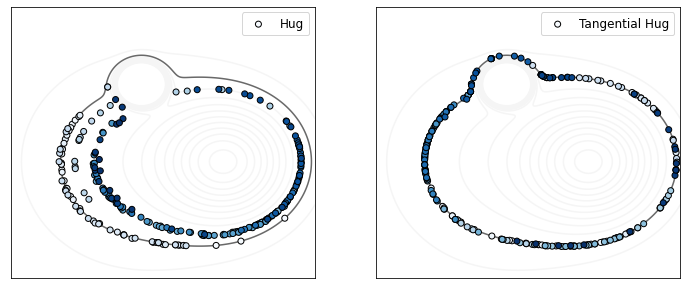

In [258]:
# 77969 (thug around), 93134 (thug around)
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
# HUG
ax[0].contour(*prep_contour([-3, 4], [-3, 4], 0.01, MG), levels=np.linspace(z-0.05, z + 0.05, num=21), colors='whitesmoke', zorder=-1)
ax[0].scatter(*hsamples.T, label="Hug", cmap='Blues', c=np.arange(len(hsamples)), edgecolors='black')
ax[0].contour(*prep_contour([-3, 4], [-3, 4], 0.01, MG), levels=[z], colors='dimgrey', zorder=0)
ax[0].legend(fontsize=12)
ax[0].set_xticks(ticks=[])
ax[0].set_yticks(ticks=[])
# THUG
ax[1].contour(*prep_contour([-3, 4], [-3, 4], 0.01, MG), levels=np.linspace(z-0.05, z + 0.05, num=21), colors='whitesmoke', zorder=-1)
ax[1].scatter(*tsamples.T, label="Tangential Hug", cmap='Blues', c=np.arange(len(tsamples)), edgecolors='black')
ax[1].contour(*prep_contour([-3, 4], [-3, 4], 0.01, MG), levels=[z], colors='dimgrey', zorder=0)
ax[1].legend(fontsize=12)
ax[1].set_xticks(ticks=[])
ax[1].set_yticks(ticks=[])
plt.savefig("figures/mixture{}.png".format(seed))
plt.show()